In [1]:
import json
import glob
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from epilepsypcm.loading.imports import respInfoToAdjacencyMatrix, zToAdjacencyMatrix, getPeakLatency

In [2]:
#still need to write code that loops through all patient folders
##but for now, just starting with the data in one folder

base_path = '/Users/shrey2/Downloads/PY16N013' #modify for your file location
response_path = base_path + '/ResponseInfo/CCEP'
z_path = base_path + '/z-scores'

response_files = os.listdir(response_path)
response_files_path = glob.glob(response_path + '/*.json', recursive=True)

z_files = os.listdir(z_path)
z_files_path = glob.glob(z_path + '/*.json', recursive=True)

In [3]:
# EXAMPLE opening response files dictionary and indexing
k = open(response_files_path[3])
data = json.load(k)
keys = []
for key in data["zscores"]: keys.append(key)
print(keys)

['AIH1_AIH2', 'AIH2_AIH3', 'AIH3_AIH4', 'REF1_REF3', 'MIH1_MIH2', 'MIH2_MIH3', 'MIH3_MIH4', 'PIH1_PIH2', 'PIH2_PIH3', 'PIH3_PIH4', 'LDA1_LDA2', 'LDA2_LDA3', 'LDA3_LDA4', 'LDA4_LDA5', 'LDA5_LDA6', 'LDA6_LDA7', 'LDA7_LDA8', 'LDB1_LDB2', 'LDB2_LDB3', 'LDB3_LDB4', 'LDB4_LDB5', 'LDB5_LDB6', 'LDB6_LDB7', 'LDB7_LDB8', 'LFP1_LFP2', 'LFP2_LFP3', 'LFP3_LFP4', 'LFP4_LFP5', 'LFP5_LFP6', 'LFP6_LFP7', 'LFP7_LFP8', 'LFP8_LFP9', 'LFP9_LFP10', 'LFP10_LFP11', 'LFP11_LFP12', 'LFP12_LFP13', 'LFP13_LFP14', 'LFP14_LFP15', 'LFP15_LFP16', 'LFP17_LFP18', 'LFP18_LFP19', 'LFP19_LFP20', 'LFP20_LFP21', 'LFP21_LFP22', 'LFP22_LFP23', 'LFP23_LFP24', 'LFP25_LFP26', 'LFP26_LFP27', 'LFP27_LFP28', 'LFP28_LFP29', 'LFP29_LFP30', 'LFP30_LFP31', 'LFP31_LFP32', 'LFP33_LFP34', 'LFP34_LFP35', 'LFP35_LFP36', 'LFP36_LFP37', 'LFP37_LFP38', 'LFP38_LFP39', 'LFP39_LFP40', 'LFP41_LFP42', 'LFP42_LFP43', 'LFP43_LFP44', 'LFP44_LFP45', 'LFP45_LFP46', 'LFP46_LFP47', 'LFP47_LFP48', 'LFP49_LFP50', 'LFP50_LFP51', 'LFP51_LFP52', 'LFP52_LFP53',

## Calling Mark's Code
### respInfoToAdjacencyMatrix

<AxesSubplot:>

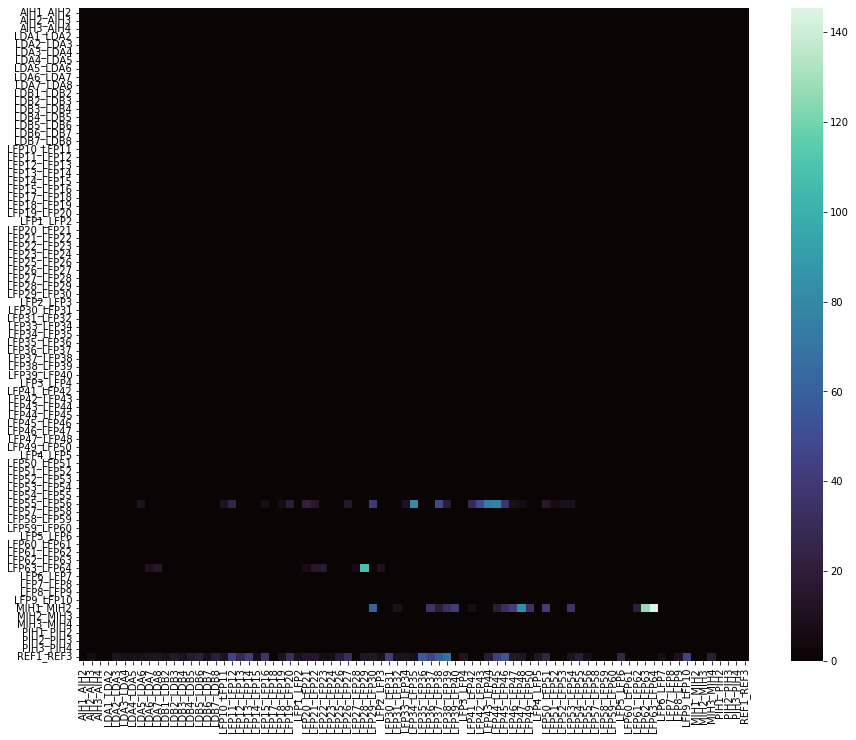

In [4]:
A, nodeLabels, allStimInds, chNames = respInfoToAdjacencyMatrix(response_files_path, "n1", 6)

import seaborn as sns
import matplotlib.pyplot as plt

A_positive = A
A_positive[A_positive<0] = 0

plt.figure(figsize = (15,12))
sns.heatmap(A_positive, cmap = "mako", xticklabels = chNames, yticklabels = chNames)

### zInfoToAdjacencyMatrix

{74, 69, 61}


<AxesSubplot:>

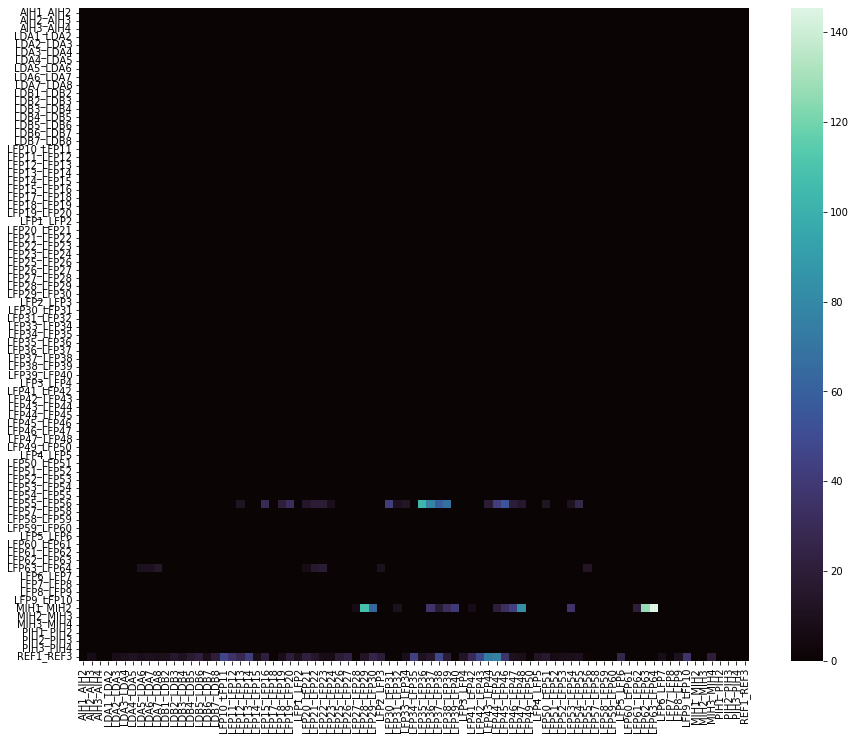

In [5]:
A, nodeLabels, allStimInds, chNames = zToAdjacencyMatrix(z_files_path)

A_positive = A
A_positive[A_positive<0] = 0

plt.figure(figsize = (15,12))
sns.heatmap(A_positive, cmap = "mako", xticklabels = chNames, yticklabels = chNames)

### getPeakLatency

In [6]:
chNames, L = getPeakLatency(response_files_path, "n1")

### Data Feature Extraction Code

In [7]:
# extracting info from each response info file
paths = response_files_path

n = 0
for i in range(len(paths)):
    chNames = []
    # load info into python dictionary
    fileInfo = paths[i].split("_")
    stimCh1 = fileInfo[1];
    stimCh2 = fileInfo[2];
    jsonData = json.load(open(paths[i]))
    
    #Get list of channel names
    for key in jsonData["time"]: chNames.append(key)
        
    # loop over each channel, and extract average time series and information about the peaks

    if n < 1:
        avgResp = np.empty((len(paths),len(chNames),len(data['time'][chNames[0]])))
        significant = np.empty((len(paths),len(chNames)))
        n1Zscore = np.empty((len(paths),len(chNames)))
        n2Zscore = np.empty((len(paths),len(chNames)))
        p2Zscore = np.empty((len(paths),len(chNames)))
        n1Latency = np.empty((len(paths),len(chNames)))
        n2Latency = np.empty((len(paths),len(chNames)))
        p2Latency = np.empty((len(paths),len(chNames)))
        flipped = np.empty((len(paths),len(chNames)))
        n += 1
        samplingRate = np.empty((len(paths)))
        window = np.empty((len(paths),2))
        
        
    for j in range(len(chNames)):
        avgResp[i][j] = data['time'][chNames[j]]
        significant[i][j] = data['significant'][chNames[j]]
        n1Zscore[i][j] = data['zscores'][chNames[j]]['n1'][1]
        n2Zscore[i][j] = data['zscores'][chNames[j]]['n2'][1]
        p2Zscore[i][j] = data['zscores'][chNames[j]]['p2'][1]
        n1Latency[i][j] = data['zscores'][chNames[j]]['n1'][0]+data['window'][0]*data["samplingRate"]/1000
        n2Latency[i][j] = data['zscores'][chNames[j]]['n2'][0]+data['window'][0]*data["samplingRate"]/1000
        p2Latency[i][j] = data['zscores'][chNames[j]]['p2'][0]+data['window'][0]*data["samplingRate"]/1000
        flipped[i][j] = data['zscores'][chNames[j]]['flipped'] 
        
    samplingRate[i] = data["samplingRate"]
    window[i] = data['window']
    
    # set the traces of stimulating channels to zero since they only
    # contain stimulating waveforms / artifacts / saturated signals
    #avgResp{k}(find( any(strcmp([split(chNames{k},'_')'],stimCh1{k})) | any(strcmp([split(chNames{k},'_')'],stimCh2{k}))))= 0;    
